# Pull in survey data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

survey = pd.read_csv('responses.csv')
survey = survey.rename(columns={'Timestamp': 'ts', 
                                '1) How old are you?': 'age', 
                                '2) What is your gender?': 'gender',
                                '3) Where are you from?': 'origin',
                                '1) How many times per week do you cook? Include breakfast, lunch, and dinner separately in your count.': 'cook_count_pw',
                                '2) How many people do you usually cook for?': 'cook_people',
                                '3) How often do you heat food (with a stove, microwave, boiler, oven, kettle, etc) when cooking? ': 'heat_freq',
                                '4) How often do you attempt new things while cooking?': 'new_freq',
                                '5) Would you be willing to try new things when cooking?': 'new_openness',
                                '6) Do you enjoy raw food meals?\n\nThe raw food diet consists of food that has not been processed or cooked but is still safe for humans to eat. Examples range from vegetable-only salads to smoked meats and many dishes in between. You can find more information and examples on Wikipedia. ': 'raw_food_enjoy',
                                'Why / why not?': 'raw_food_enjoy_fr',
                                '7) How often do you throw away food items because they have perished? ': 'perish_freq', 
                                '8) Do you know what you have in your fridge right now? ': 'fridge_knowledge', 
                                '9) Do you consult recipes on your phone while cooking?': 'recipes_on_phone', 
                                "If you consult recipes elsewhere, why don't you use your phone? (Select one or more; feel free to add your own answer)": 'recipes_on_phone_fr', 
                                '10) How often do you perform small actions (avoid food waste, support local food production, avoid palm oil ...) to help the planet/environment?': 'small_act_environment',
                                '11) What color makes you think about food/eating?': 'food_color',
                                '12) If you need to cook with others, which type of person do you prefer?': 'cook_personality',
                                '13) Finally, whenever you cook, how do usually feel? Why?': 'cook_feeling'
                                })

# Why they do and don't like raw food

[Text(0, 0, 'Taste'),
 Text(1, 0, 'Health'),
 Text(2, 0, 'Ease'),
 Text(3, 0, 'Normal'),
 Text(4, 0, 'Novel'),
 Text(5, 0, 'Seasonal'),
 Text(6, 0, 'Other')]

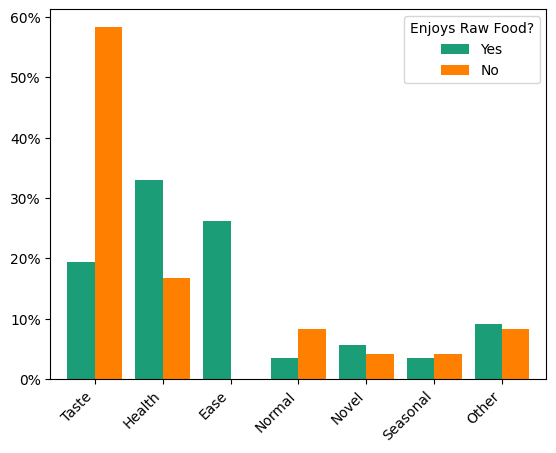

In [129]:
survey['raw_food_enjoy_reason(s)'] = survey.apply(lambda row: [], axis=1)

def reason_shell(row, w_list, reason_w):
    for w in w_list:
        if w in row['raw_food_enjoy_fr'].lower():
            row['raw_food_enjoy_reason(s)'].append(reason_w)
            break
    return row

def append_reasons(row):
    # healthy/unhealthy
    reason_shell(row, ['fresh', 'health', 'heath', 'calories', 'nutrients', 'nutriments', 'nutrit', 'vitamin', 'processed', 'additive', 'plant-based', 'sick'], 'Health')
    # ease/difficult
    reason_shell(row, ['easy', 'easier', 'fast', 'time', 'anywhere', 'quick', 'convenient', 'expensive', 'effort'], 'Ease')
    # taste
    reason_shell(row, ['taste', 'disgusting', 'flavor', 'tasty', 'delicious', 'texture', 'crunch'], 'Taste')
    # new
    reason_shell(row, ['new', 'knowledge', 'interesting'], 'Novel')
    # normal
    reason_shell(row, ['typical', 'fire', 'used', 'already', 'normal', 'primal'], 'Normal')
    # seasonal
    reason_shell(row, ['winter', 'summer'], 'Seasonal')

    # other
    if not row['raw_food_enjoy_reason(s)']:
        row['raw_food_enjoy_reason(s)'] = ['Other']

    return row

# Apply the function to each row
survey = survey.apply(append_reasons, axis=1)

survey.loc[survey['raw_food_enjoy_fr'] == 'I don’t like this type of food', 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == "I can't eat it", 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == "It's okay but prefer cooked food. ", 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == 'not muy type', 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == '害怕生病 觉得冷的东西不好吃', 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == 'Only sashimi and smoke salmon possible to eat.', 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == 'My stomach enjoys cooked food', 'raw_food_enjoy_reason(s)'] = ['Taste']
survey.loc[survey['raw_food_enjoy_fr'] == 'I have a bad stomach.', 'raw_food_enjoy_reason(s)'] = ['Health']

survey_exploded = survey.explode('raw_food_enjoy_reason(s)')
pivot_table = survey_exploded.pivot_table(index='raw_food_enjoy_reason(s)', columns='raw_food_enjoy', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=0), axis=1)
tmp = pivot_table_percentage.reset_index()
tmp['comb'] = tmp['No'] + tmp['Yes']
tmp = tmp.sort_values(by='comb', ascending=False).reset_index()
tmp['order'] = tmp.index
tmp.loc[tmp["raw_food_enjoy_reason(s)"] == "Other", 'order'] = len(tmp)
tmp = tmp.sort_values(by='order')
tmp = tmp[['raw_food_enjoy_reason(s)', 'Yes', 'No']].set_index('raw_food_enjoy_reason(s)')
plt = tmp.plot(kind='bar', width=0.8, color=['#1b9e77', '#ff7f00'], xlabel='')
plt.legend(title='Enjoys Raw Food?', loc='upper right', labels=['Yes', 'No'])
plt.yaxis.set_major_formatter('{:.0%}'.format)
plt.yaxis.set_major_locator(MultipleLocator(.1))
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, ha='right')

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 200)
tmp1 = survey[(survey['raw_food_enjoy'] == 'No')]
tmp2 = tmp1.explode('raw_food_enjoy_reason(s)')
tmp2[tmp2['raw_food_enjoy_reason(s)'] == 'Other']['raw_food_enjoy_fr']
#print(tmp1['raw_food_enjoy_reason(s)'] == ['Other'])

39                  prefer hot meals
48    Je n’aime pas les légumes crus
Name: raw_food_enjoy_fr, dtype: object

# What do they feel?

In [56]:
survey['cook_sentiment'] = ''

survey.at[0, 'cook_sentiment'] = 'A'
survey.at[1, 'cook_sentiment'] = 'P'
survey.at[2, 'cook_sentiment'] = 'P'
survey.at[3, 'cook_sentiment'] = 'P'
survey.at[4, 'cook_sentiment'] = 'P'
survey.at[5, 'cook_sentiment'] = 'P'
survey.at[6, 'cook_sentiment'] = 'P'
survey.at[7, 'cook_sentiment'] = 'P'
survey.at[8, 'cook_sentiment'] = 'P'
survey.at[9, 'cook_sentiment'] = 'P'

survey.at[10, 'cook_sentiment'] = 'A'
survey.at[11, 'cook_sentiment'] = 'P'
survey.at[12, 'cook_sentiment'] = 'N'
survey.at[13, 'cook_sentiment'] = 'P'
survey.at[14, 'cook_sentiment'] = 'A'
survey.at[15, 'cook_sentiment'] = 'P'
survey.at[16, 'cook_sentiment'] = 'P'
survey.at[17, 'cook_sentiment'] = 'P'
survey.at[18, 'cook_sentiment'] = 'P'
survey.at[19, 'cook_sentiment'] = 'P'

survey.at[20, 'cook_sentiment'] = 'P'
survey.at[21, 'cook_sentiment'] = 'P'
survey.at[22, 'cook_sentiment'] = 'A'
survey.at[23, 'cook_sentiment'] = 'P'
survey.at[24, 'cook_sentiment'] = 'N'
survey.at[25, 'cook_sentiment'] = 'P'
survey.at[26, 'cook_sentiment'] = 'P'
survey.at[27, 'cook_sentiment'] = 'N'
survey.at[28, 'cook_sentiment'] = 'P'
survey.at[29, 'cook_sentiment'] = 'P'

survey.at[30, 'cook_sentiment'] = 'P'
survey.at[31, 'cook_sentiment'] = 'A'
survey.at[32, 'cook_sentiment'] = 'P'
survey.at[33, 'cook_sentiment'] = 'A'
survey.at[34, 'cook_sentiment'] = 'P'
survey.at[35, 'cook_sentiment'] = 'N'
survey.at[36, 'cook_sentiment'] = 'P'
survey.at[37, 'cook_sentiment'] = 'A'
survey.at[38, 'cook_sentiment'] = 'A'
survey.at[39, 'cook_sentiment'] = 'N'

survey.at[40, 'cook_sentiment'] = 'N'
survey.at[41, 'cook_sentiment'] = 'P'
survey.at[42, 'cook_sentiment'] = 'P'
survey.at[43, 'cook_sentiment'] = 'A'
survey.at[44, 'cook_sentiment'] = 'A'
survey.at[45, 'cook_sentiment'] = 'A'
survey.at[46, 'cook_sentiment'] = 'P'
survey.at[47, 'cook_sentiment'] = 'A'
survey.at[48, 'cook_sentiment'] = 'P'
survey.at[49, 'cook_sentiment'] = 'P'

survey.at[50, 'cook_sentiment'] = 'P'
survey.at[51, 'cook_sentiment'] = 'A'
survey.at[52, 'cook_sentiment'] = 'P'
survey.at[53, 'cook_sentiment'] = 'P'
survey.at[54, 'cook_sentiment'] = 'P'
survey.at[55, 'cook_sentiment'] = 'P'
survey.at[56, 'cook_sentiment'] = 'A'
survey.at[57, 'cook_sentiment'] = 'A'
survey.at[58, 'cook_sentiment'] = 'P'
survey.at[59, 'cook_sentiment'] = 'P'

survey.at[60, 'cook_sentiment'] = 'P'
survey.at[61, 'cook_sentiment'] = 'N'
survey.at[62, 'cook_sentiment'] = 'A'
survey.at[63, 'cook_sentiment'] = 'P'
survey.at[64, 'cook_sentiment'] = 'A'
survey.at[65, 'cook_sentiment'] = 'P'
survey.at[66, 'cook_sentiment'] = 'A'
survey.at[67, 'cook_sentiment'] = 'P'
survey.at[68, 'cook_sentiment'] = 'P'
survey.at[69, 'cook_sentiment'] = 'P'

survey.at[70, 'cook_sentiment'] = 'P'
survey.at[71, 'cook_sentiment'] = 'P'
survey.at[72, 'cook_sentiment'] = 'P'
survey.at[73, 'cook_sentiment'] = 'N'
survey.at[74, 'cook_sentiment'] = 'P'
survey.at[75, 'cook_sentiment'] = 'P'
survey.at[76, 'cook_sentiment'] = 'A'
survey.at[77, 'cook_sentiment'] = 'N'
survey.at[78, 'cook_sentiment'] = 'N'
survey.at[79, 'cook_sentiment'] = 'P'

survey.at[80, 'cook_sentiment'] = 'P'
survey.at[81, 'cook_sentiment'] = 'P'
survey.at[82, 'cook_sentiment'] = 'P'
survey.at[83, 'cook_sentiment'] = 'P'
survey.at[84, 'cook_sentiment'] = 'N'
survey.at[85, 'cook_sentiment'] = 'N'
survey.at[86, 'cook_sentiment'] = 'A'
survey.at[87, 'cook_sentiment'] = 'P'
survey.at[88, 'cook_sentiment'] = 'N'

In [79]:
survey['cook_feeling_word(s)'] = survey.apply(lambda row: [], axis=1)

def ckfl_shell(row, w_list, reason_w):
    for w in w_list:
        if w in row['cook_feeling'].lower():
            row['cook_feeling_word(s)'].append(reason_w)
            break
    return row

def append_ckfl_words(row):
    # relaxed
    ckfl_shell(row, ['repose', 'relax', 'comfty', 'relief', 'calm', 'therapy', 'thoughts', 'meditati'], 'Relaxation')
    # acheivement
    ckfl_shell(row, ['satisfied', 'achieve', 'accomplish', 'proud', 'productive', 'worthwhile', 'useful', 'hands', 'challenge'], 'Achievement')
    # anticipation (good)
    ckfl_shell(row, ['excited', 'inspired'], 'Anticipation')
    # bothersome
    ckfl_shell(row, ['life(credit', 'impatient', 'annoyed', 'perdre', 'burned', 'strapped', 'occupied'], 'Irritation')
    # hungry
    ckfl_shell(row, ['hungry'], 'Hungry')
    # anxiety
    ckfl_shell(row, ['anxiety', 'stress', 'strapped', 'afraid', 'worry', 'nervous'], 'Anxiety')
    # taxed
    ckfl_shell(row, ['chore', 'task', 'tired', 'overwhelmed', 'tortured', 'exhaust'], 'Exhaustion')
    # control / rejuvination
    ckfl_shell(row, ['redeem', 'love', 'content', 'control', 'creati'], 'Efficacy')
    # health
    ckfl_shell(row, ['natural', 'health', 'vegan'], 'Health')
    # music
    ckfl_shell(row, ['music'], 'Music')
    # community
    ckfl_shell(row, ['culture', 'ability', 'someone', 'family', 'girlfriend', 'alone'], 'Community')
    # money
    ckfl_shell(row, ['money', 'affordable'], 'Money')

    # other
    if not row['cook_feeling_word(s)']:
        row['cook_feeling_word(s)'] = ['Other']

    return row

survey = survey.apply(append_ckfl_words, axis=1)

survey.loc[survey['cook_feeling'] == 'I feel very relaxed, because cooking is a way to relax and the food is seasoned according to my own taste.', 'cook_feeling_word(s)'] = ['Efficacy']
survey.loc[survey['cook_feeling'] == '很麻烦 不喜欢做饭', 'cook_feeling_word(s)'] = ['Exhaustion']

[Text(0, 0, 'Achievement'),
 Text(1, 0, 'Relaxation'),
 Text(2, 0, 'Efficacy'),
 Text(3, 0, 'Community'),
 Text(4, 0, 'Anticipation'),
 Text(5, 0, 'Anxiety'),
 Text(6, 0, 'Exhaustion'),
 Text(7, 0, 'Hungry'),
 Text(8, 0, 'Money'),
 Text(9, 0, 'Music'),
 Text(10, 0, 'Health'),
 Text(11, 0, 'Other')]

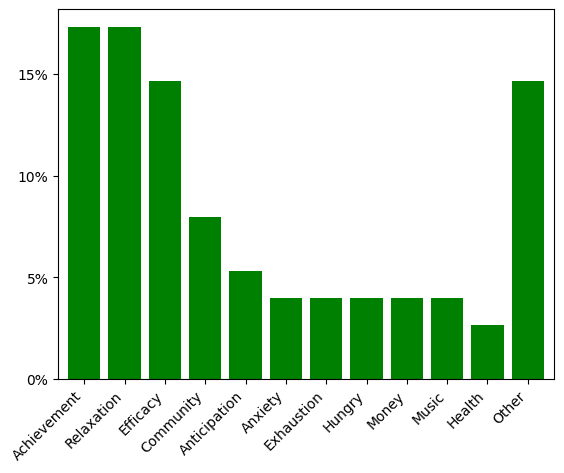

In [80]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
survey_exploded = survey[survey['cook_sentiment'] == "P"].explode('cook_feeling_word(s)')
survey_exploded_agg = survey_exploded.groupby('cook_feeling_word(s)').agg('count')['ts']
word_dist = (pd.DataFrame(survey_exploded_agg) / pd.DataFrame(survey_exploded_agg).sum(axis=0))
word_dist = word_dist.sort_values(by='ts', ascending=False).reset_index()
word_dist['order'] = word_dist.index
word_dist.loc[word_dist["cook_feeling_word(s)"] == "Other", 'order'] = len(word_dist)
#word_dist.plot(kind='bar', width=0.8)
word_dist = word_dist.sort_values(by="order")[['cook_feeling_word(s)', 'ts']]
ax = word_dist.set_index(keys='cook_feeling_word(s)').plot(kind='bar', width=0.8, legend=False, color = 'green', xlabel='')
ax.yaxis.set_major_formatter('{:.0%}'.format)
ax.yaxis.set_major_locator(MultipleLocator(.05))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'Anxiety'),
 Text(1, 0, 'Exhaustion'),
 Text(2, 0, 'Irritation'),
 Text(3, 0, 'Hungry'),
 Text(4, 0, 'Community'),
 Text(5, 0, 'Health'),
 Text(6, 0, 'Achievement'),
 Text(7, 0, 'Relaxation'),
 Text(8, 0, 'Other')]

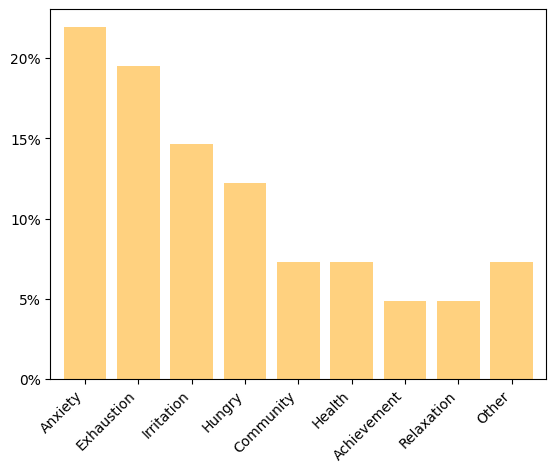

In [81]:
survey_exploded = survey[survey['cook_sentiment'] != "P"].explode('cook_feeling_word(s)')
survey_exploded_agg = survey_exploded.groupby('cook_feeling_word(s)').agg('count')['ts']
word_dist = (pd.DataFrame(survey_exploded_agg) / pd.DataFrame(survey_exploded_agg).sum(axis=0))
word_dist = word_dist.sort_values(by='ts', ascending=False).reset_index()
word_dist['order'] = word_dist.index
word_dist.loc[word_dist["cook_feeling_word(s)"] == "Other", 'order'] = len(word_dist)
#word_dist.plot(kind='bar', width=0.8)
word_dist = word_dist.sort_values(by="order")[['cook_feeling_word(s)', 'ts']]
ax = word_dist.set_index(keys='cook_feeling_word(s)').plot(kind='bar', width=0.8, legend=False, color = '#FFA50080', xlabel='')
ax.yaxis.set_major_formatter('{:.0%}'.format)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [ ]:
music - 2
own culture - 1
therapy/meditation/anxiety relief - 4
achievement/challenge - 2
teach self that self can be happy - 1
bonding with others - 1
natural/healthy for others - 2
creative - 1

In [15]:
word_dist

,ts
cook_feeling_word(s),
Other,14.666667
accomplishment,14.666667
anticipation,5.333333
anxiety,4.000000
control/rejuvination,14.666667
health,2.666667
hungry,4.000000
identity,2.666667
money,4.000000


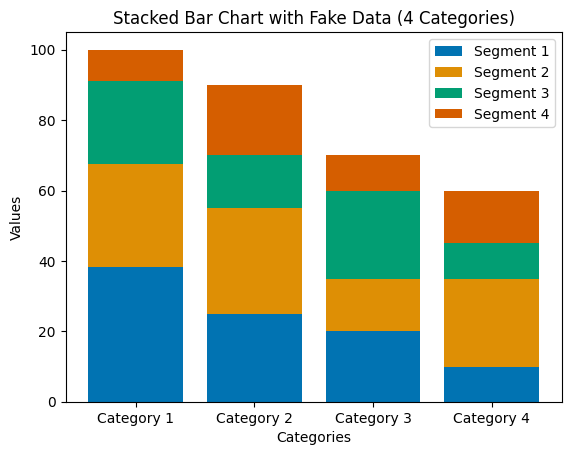

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Fake data lists
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
data1 = [38.2, 25, 20, 10]
data2 = [29.2, 30, 15, 25]
data3 = [23.6, 15, 25, 10]
data4 = [9, 20, 10, 15]

# Create stacked bar chart
bar_positions = range(len(categories))

colors = sns.color_palette("colorblind")

plt.bar(bar_positions, data1, label='Segment 1', color=colors[0])
plt.bar(bar_positions, data2, bottom=data1, label='Segment 2', color=colors[1])
plt.bar(bar_positions, data3, bottom=[i + j for i, j in zip(data1, data2)], label='Segment 3', color=colors[2])
plt.bar(bar_positions, data4, bottom=[i + j + k for i, j, k in zip(data1, data2, data3)], label='Segment 4', color=colors[3])

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Chart with Fake Data (4 Categories)')
plt.xticks(bar_positions, categories)
plt.legend()
plt.show()


In [21]:
np.random.randint(10, 30, size=len(categories))

array([13, 29, 13])

In [28]:
pip install seaborn


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   --------------------------------- ------ 245.8/294.6 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
